In [2]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

In [3]:
def weighted_random_question(agreement_val, correct_ans):
    my_list = []
    for i in np.arange(1, 6):
        if i == correct_ans:
            my_list += [str(correct_ans)] * int(agreement_val * 100)
        else:
            my_list += [str(i)] * int((1 - agreement_val) / abs(correct_ans - i) * 100)
    return int(rand.choice(my_list))

In [4]:
def weighted_random_pos_old(agreement_val, correct_ans, source_length):
    pos_range = int((1 - agreement_val) ** 2 / 2 * source_length)
    start = correct_ans - pos_range
    end = correct_ans + pos_range + 1
    if start < 0:
        start = 0
    if end > source_length:
        end = source_length
    interval = np.arange(start, end)
    result = []
    for i in interval:
        if i == correct_ans:
            result += [str(i)] * int(agreement_val ** 2 * 100)
        else:
            result += [str(i)] * int(agreement_val ** 2/ (abs(correct_ans - i)) * 100)
    return int(rand.choice(result))

In [5]:
def weighted_random_pos(agreement_val, correct_ans, source_length):
    normal = np.random.normal(correct_ans, (1 - agreement_val) * 2 * source_length ** 0.5, 10000)
    return int(rand.choice(normal))

In [6]:
def get_highlight_length():
    normal = np.random.normal(50, 12, 10000)
    return int(rand.choice(normal))

In [7]:
def generate_agreement(agreement, num_users, num_questions, source_len):
    answer_number= np.zeros(0)
    start_pos = np.zeros(0)
    end_pos = np.zeros(0)
    for i in np.arange(num_questions):
        correct_ans = rand.randint(1, 5)
        correct_start = rand.randint(source_len / 4, source_len / 2)
        correct_end = correct_start + get_highlight_length()
        print(correct_start)
        print(correct_end)
        print(get_highlight_length())
        for j in np.arange(num_users):
            answer_number = np.append(answer_number, weighted_random_question(agreement[j], correct_ans))
            start_pos = np.append(start_pos, weighted_random_pos(agreement[j], correct_start, source_len))
            end_pos = np.append(end_pos, weighted_random_pos(agreement[j], correct_end, source_len))
    return answer_number, start_pos, end_pos

In [8]:
def create_run(agreement, num_run, num_users = 5, num_questions = 10, source_len = 4000, ans_type_prop = [1, 0]):
    rows = np.zeros(num_users * num_questions)
    inputs = generate_agreement(agreement, num_users, num_questions, source_len)
    d = {'taskrun_article_number': rows + num_run, 
         'contributor_id': np.tile(np.arange(1, num_users + 1), num_questions), 
         'question_number': np.repeat(np.arange(1, num_questions + 1), num_users), 
         'answer_number': inputs[0], 'start_pos': inputs[1], 
         'end_pos': inputs[2], 'source_text_length': rows + source_len, 
         'answer_type': np.append(np.repeat('nominal', int(ans_type_prop[0] * len(rows))),
                                       np.repeat('ordinal', int(ans_type_prop[1] * len(rows)))),
         'question_text': rows}
    run = pd.DataFrame(d)
    run = run[['taskrun_article_number', 'contributor_id', 
         'question_number', 'answer_number', 'start_pos', 
         'end_pos', 'source_text_length', 'answer_type', 'question_text']]
    return run

In [9]:
def create_series(agreement_arr, ans_type_prop = [1, 0]):
    for i in np.arange(len(agreement_arr)):
        current = create_run(agreement_arr[i], i, ans_type_prop = ans_type_prop)
        current.to_csv('Series_Output/Run' + str(i) + '.csv')

In [10]:
create_series([[0.9, 0.9, 0.9, 0.5, 0.1], [0.9, 0.9, 0.9, 0.5, 0.2], [0.9, 0.9, 0.9, 0.6, 0.3], 
               [0.9, 0.9, 0.9, 0.7, 0.4], [0.9, 0.9, 0.9, 0.8, 0.5], [0.9, 0.9, 0.9, 0.9, 0.5], 
               [0.9, 0.9, 0.9, 0.1, 0.6], [0.9, 0.9, 0.9, 0.1, 0.7], [0.9, 0.9, 0.9, 0.1, 0.8], 
               [0.9, 0.9, 0.9, 0.1, 0.9]])

1833
1878
58
2000
2041
36
1576
1614
55
1623
1678
51
1240
1284
37
1165
1219
41
1288
1340
25
1764
1806
31
1453
1505
74
1416
1460
54
1380
1435
60
1738
1779
28
1571
1622
56
1447
1508
60
1975
2034
64
1466
1517
59
1359
1411
51
1438
1492
68
1144
1190
70
1825
1883
45
1691
1777
46
1908
1962
18
1413
1461
41
1680
1733
42
1409
1452
45
1614
1635
53
1405
1464
46
1169
1237
60
1037
1104
64
1998
2045
33
1547
1602
26
1550
1605
54
1656
1690
47
1855
1903
42
1785
1832
47
1233
1276
62
1074
1140
36
1968
2010
37
1164
1208
64
1677
1739
52
1604
1656
52
1023
1077
47
1877
1902
59
1964
2014
34
1964
2008
48
1396
1457
37
1441
1480
59
1860
1913
67
1370
1408
43
1898
1912
42
1501
1557
53
1938
1983
59
1813
1885
70
1498
1543
73
1235
1290
46
1879
1926
65
1539
1582
52
1864
1915
30
1392
1440
49
1266
1310
48
1580
1610
53
1110
1166
60
1326
1379
41
1683
1725
63
1849
1886
35
1412
1439
48
1554
1609
18
1089
1152
42
1950
1983
56
1410
1462
56
1399
1447
39
1937
1973
60
1674
1706
64
1060
1101
48
1673
1716
65
1956
1997
72
1504
1558
52

In [11]:
create_series([[0.7, 0.7, 0.7, 0.7, 0.1], [0.7, 0.7, 0.7, 0.7, 0.5], [0.7, 0.7, 0.7, 0.7, 0.6], 
              [0.7, 0.7, 0.7, 0.7, 0.7], [0.7, 0.7, 0.7, 0.7, 0.8], [0.7, 0.7, 0.7, 0.7, 0.9],
              [0.7, 0.7, 0.7, 0.7, 0.9], [0.7, 0.7, 0.7, 0.7, 0.9], [0.7, 0.7, 0.7, 0.7, 0.9],
              [0.7, 0.7, 0.7, 0.7, 0.9]])

1820
1875
42
1476
1522
59
1487
1535
48
1228
1275
46
1308
1356
42
1337
1403
53
1697
1725
57
1419
1489
48
1297
1347
36
1665
1714
55
1549
1601
37
1703
1733
45
1699
1739
59
1814
1866
31
1206
1261
31
1432
1469
68
1610
1654
39
1488
1535
47
1028
1074
60
1541
1590
57
1269
1313
66
1959
2022
54
1259
1314
27
1158
1232
32
1773
1804
44
1787
1874
61
1649
1687
51
1118
1165
58
1449
1474
69
1034
1075
48
1499
1550
65
1001
1031
41
1473
1518
68
1558
1614
67
1022
1054
51
1122
1167
55
1109
1143
37
1464
1511
45
1477
1523
48
1922
1961
64
1976
2026
37
1403
1467
38
1430
1485
51
1745
1798
66
1584
1632
48
1136
1179
39
1451
1497
44
1677
1723
49
1849
1889
46
1242
1275
37
1455
1499
31
1416
1447
61
1761
1806
49
1943
1976
37
1316
1356
48
1653
1696
62
1573
1635
60
1948
1997
39
1827
1888
30
1240
1290
48
1916
1981
38
1252
1284
69
1086
1158
53
1450
1501
56
1115
1146
49
1697
1739
44
1538
1592
52
1203
1249
41
1362
1426
58
1029
1070
44
1646
1670
49
1956
2005
43
1334
1392
42
1328
1371
49
1147
1182
41
1224
1260
48
1844
1887
54

In [21]:
def create_arrays():
    dude = []
    array = [.9, .9, .7, .5, .1]
    for i in range(50):
        array[3] += 0.01
        array[4] += 0.01
        dude.append(array[:])
    return dude
        

In [22]:
create_series(create_arrays(), ans_type_prop = [0, 1])

1026
1084
49
1290
1350
63
1640
1687
47
1755
1784
57
1611
1629
49
1416
1449
67
1992
2051
34
1186
1237
50
1674
1734
51
1453
1509
54
1012
1066
44
1538
1586
59
1418
1490
39
1787
1830
43
1419
1453
53
1636
1680
22
1254
1318
57
1120
1176
45
1199
1248
50
1881
1926
57
1526
1575
42
1670
1699
40
1064
1125
37
1648
1693
55
1284
1327
58
1592
1620
37
1381
1431
52
1259
1306
47
1173
1245
65
1100
1140
43
1186
1243
50
1531
1574
39
1718
1766
62
1896
1940
39
1331
1410
35
1091
1154
55
1570
1605
38
1378
1442
53
1512
1569
41
1467
1527
40
1773
1825
57
1250
1303
64
1617
1652
61
1360
1405
35
1043
1068
46
1443
1493
32
1653
1714
38
1126
1186
35
1820
1854
65
1525
1583
48
1983
2039
69
1706
1750
55
1884
1960
47
1489
1548
53
1986
2020
55
1673
1718
40
1682
1730
49
1506
1553
62
1095
1152
18
1035
1078
46
1447
1492
39
1327
1393
57
1839
1882
49
1164
1218
55
1107
1152
45
1680
1724
26
1028
1100
26
1716
1742
34
1536
1600
62
1174
1235
45
1482
1500
44
1015
1079
39
1337
1395
35
1982
2026
67
1886
1943
54
1524
1582
54
1770
1810
32

ValueError: scale < 0

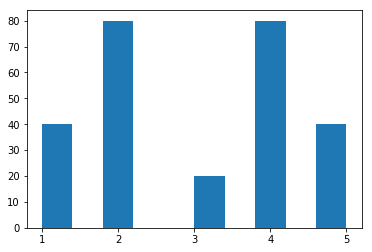

In [29]:
my_list = []
correct_ans = 3
agreement_val = 0.2
for i in np.arange(1, 6):
    if i == correct_ans:
        my_list += [str(correct_ans)] * int(agreement_val * 100)
    else:
        my_list += [str(i)] * int((1 - agreement_val) / abs(correct_ans - i) * 100)
plt.hist(my_list)
plt.show()

710
1610
0 1610
200
['610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '660', '661', '661', '662', '662', '663', '663', '664', '664', '665', '665', '666', '666', '667', '667', '668', '668', '669', '669', '670', '670', '671', '671', '672', '672', '673', '673', '674', '674', '675', '675', '676', '676', '677', '677', '677', '678', '678', '678', '679', '679', '679', '680', '680', '680', '681', '681', '681', '682', '682', '682', '683', '683', '683', '684', '684', '684', '685', '685', '685', '685', '686', '686', '686', '686', '687', '687', '687', '687', '688', '688', '688', '688', '689', '689', '689', '689', '690', '690', '690', '690', '690', '691', '691', '691', '691', '691', '692', '692',

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


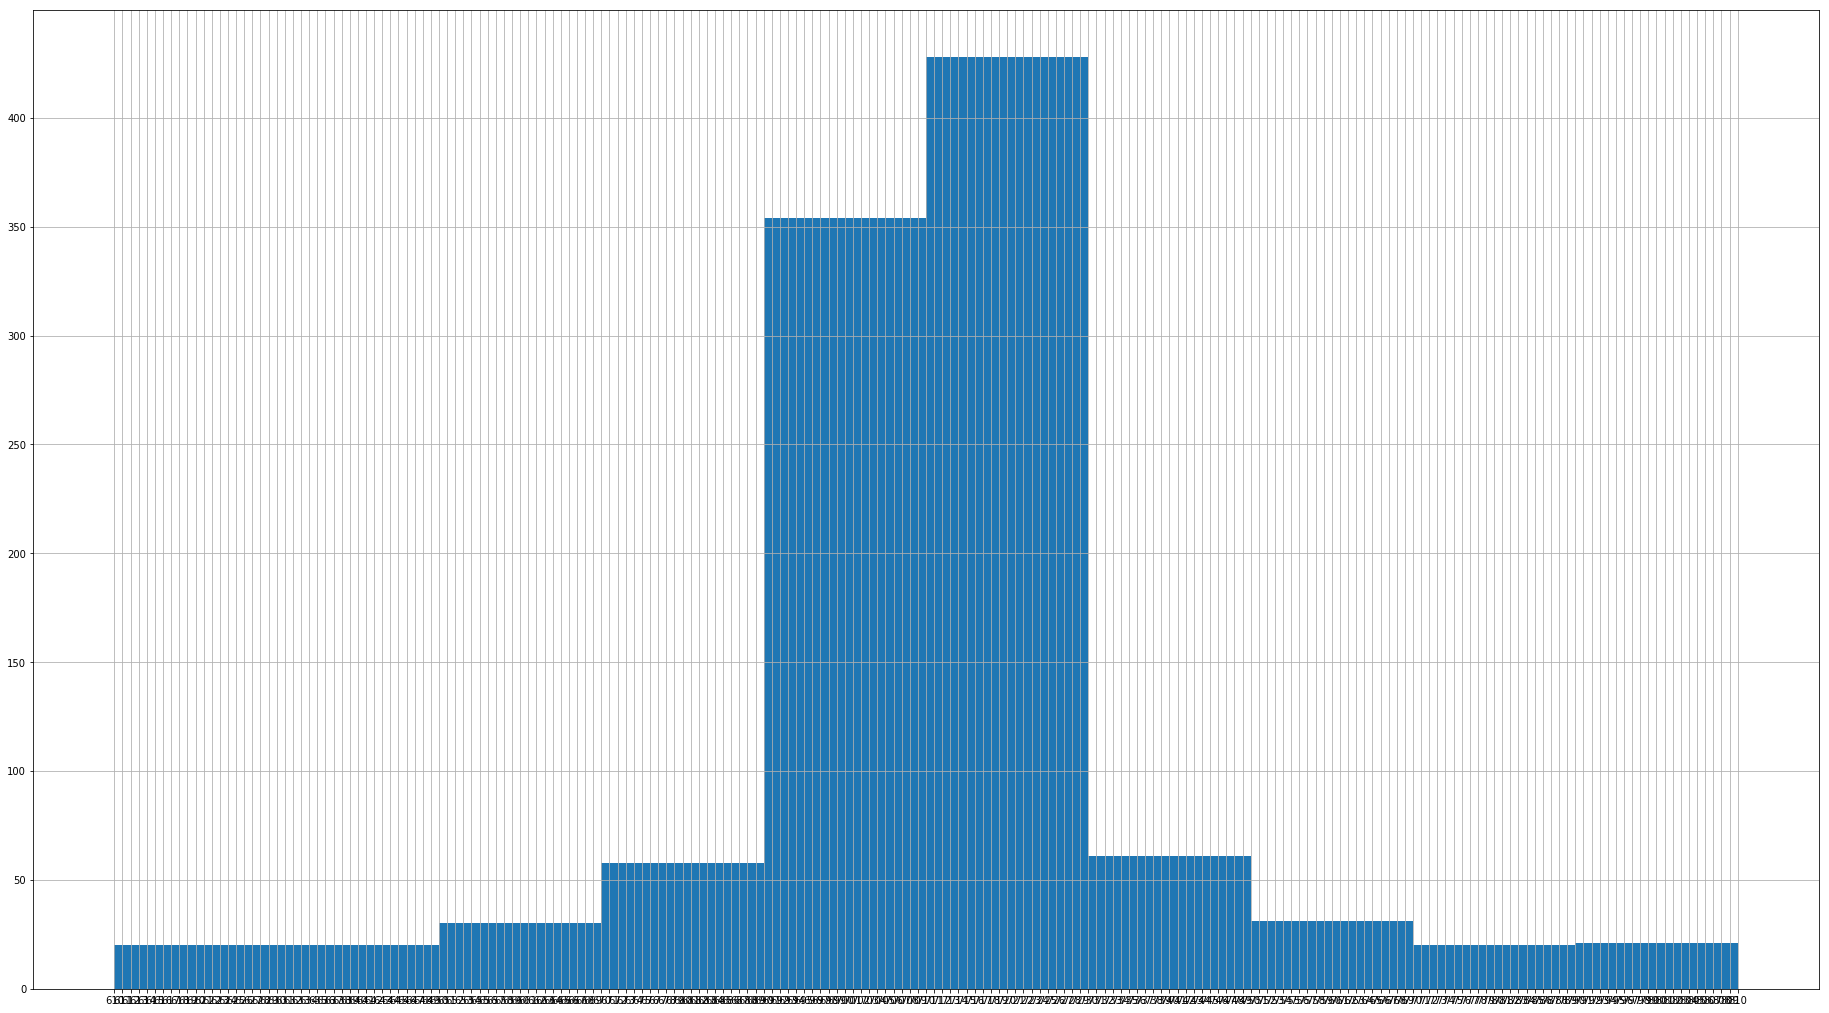

In [39]:
source_length = 2000
correct_ans = rand.randint(source_length / 4, source_length / 2)
#correct_ans = rand.randint(correct_start, source_length)
agreement_val = 0.1
pos_range = int((1 - agreement_val) / 2 * source_length)
start = correct_ans - pos_range
end = correct_ans + pos_range + 1
if start < 0:
    start = 0
if end > source_length:
    end = source_length
interval = np.arange(start, end)
result = []
for i in interval:
    if i == correct_ans:
        result += [str(i)] * int(agreement_val ** agreement_val * 100)
    else:
        result += [str(i)] * int(agreement_val / (abs(correct_ans - i) * agreement_val)  * 100)
print(correct_ans)
print(int(interval[len(interval) - 1]) - int(interval[0]))
print(int(interval[0]), int(interval[len(interval) - 1]))
print(int(result[len(result) - 1]) - int(result[0]))
print(result)
plt.figure(figsize = (32, 18))
plt.grid('on')
plt.hist(result)
plt.show()

1440
1428


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


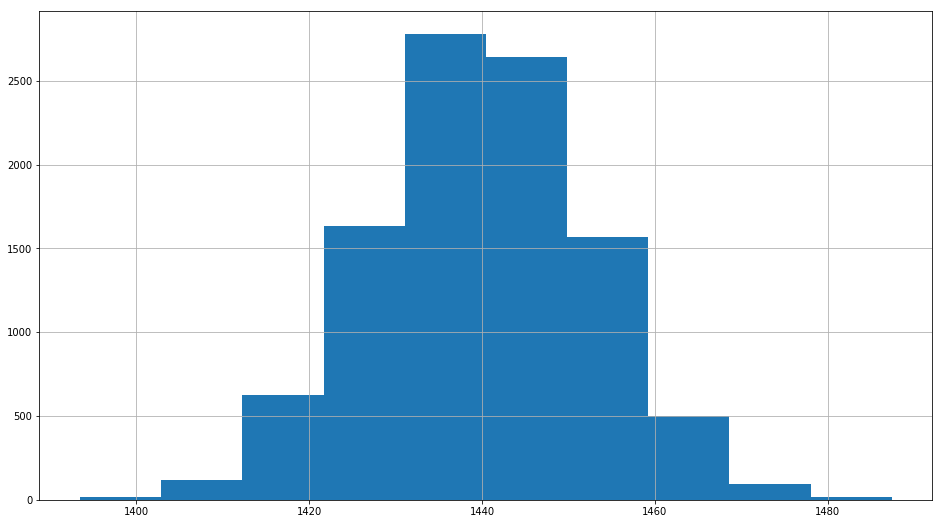

In [14]:
agreement_val = 0.9
source_length = 4000
correct_ans = rand.randint(source_length / 4, source_length / 2)
print(correct_ans)
normal = np.random.normal(correct_ans, (1 - agreement_val) * 2 * source_length ** 0.5, 10000)
print(int(rand.choice(normal)))
plt.figure(figsize = (16, 9))
plt.grid('on')
plt.hist(normal)
plt.show()

In [61]:
normal

array([1299.81542388, 1298.62059685, 1303.43140591, ..., 1300.91581038,
       1302.3158684 , 1304.22110321])